In [2]:
with open('hpmor_ru.txt','r') as f:
  X=f.read()
X

Output hidden; open in https://colab.research.google.com to view.

In [3]:
gld_quote= "Однажды у меня жил камень. Он умер."

X= X[ : X.find(gld_quote) + len(gld_quote)]

X

'<p>Ещё в процессе написания "Гарри Поттер и методы рационального мышления" занимали первые места по популярности в мире среди всех фанфиков по Гарри Поттеру (место варьировалось между первым и третьим в зависимости от метода подсчёта - по числу отзывов или числу подписчиков). С тех пор, впрочем, у них появились и другие конкуренты. Эта история обрела поклонников во многих университетах мира, а 14 марта 2015 года, в день выхода последней, 122 главы, читатели организовали десятки вечеринок в честь этого события. Можно даже сказать, что этот фанфик породил собственный небольшой жанр, именуемый "рационалистское творчество". И сейчас у вас в руках печатное издание русского перевода — творение, в создание которого вложили свою любовь множество людей: [здесь надо указать имена переводчиков, оформителей, верстальщиков].</p>\n\n<p>Рассказанная мной история происходит во вселенной Гарри Поттера, созданной Дж.  К.  Роулинг.  Точнее, она происходит в гораздо более обширной вселенной фанфиков по Г

In [4]:
import re

X = re.sub(r"<[^>]+>", "", X, flags=re.S)

X

'Ещё в процессе написания "Гарри Поттер и методы рационального мышления" занимали первые места по популярности в мире среди всех фанфиков по Гарри Поттеру (место варьировалось между первым и третьим в зависимости от метода подсчёта - по числу отзывов или числу подписчиков). С тех пор, впрочем, у них появились и другие конкуренты. Эта история обрела поклонников во многих университетах мира, а 14 марта 2015 года, в день выхода последней, 122 главы, читатели организовали десятки вечеринок в честь этого события. Можно даже сказать, что этот фанфик породил собственный небольшой жанр, именуемый "рационалистское творчество". И сейчас у вас в руках печатное издание русского перевода — творение, в создание которого вложили свою любовь множество людей: [здесь надо указать имена переводчиков, оформителей, верстальщиков].\n\nРассказанная мной история происходит во вселенной Гарри Поттера, созданной Дж.  К.  Роулинг.  Точнее, она происходит в гораздо более обширной вселенной фанфиков по Гарри Потте

In [ ]:
#from bs4 import BeautifulSoup

#soup = BeautifulSoup(X)
#X = soup.get_text()

In [5]:
import nltk
import re

X = X.replace('\n',' ')
nltk.download('punkt')
X=nltk.tokenize.sent_tokenize(X)
X=[sent for sent in X if not re.match('[\d.]+$',sent)]

X

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Ещё в процессе написания "Гарри Поттер и методы рационального мышления" занимали первые места по популярности в мире среди всех фанфиков по Гарри Поттеру (место варьировалось между первым и третьим в зависимости от метода подсчёта - по числу отзывов или числу подписчиков).',
 'С тех пор, впрочем, у них появились и другие конкуренты.',
 'Эта история обрела поклонников во многих университетах мира, а 14 марта 2015 года, в день выхода последней, 122 главы, читатели организовали десятки вечеринок в честь этого события.',
 'Можно даже сказать, что этот фанфик породил собственный небольшой жанр, именуемый "рационалистское творчество".',
 'И сейчас у вас в руках печатное издание русского перевода — творение, в создание которого вложили свою любовь множество людей: [здесь надо указать имена переводчиков, оформителей, верстальщиков].',
 'Рассказанная мной история происходит во вселенной Гарри Поттера, созданной Дж.',
 'К.  Роулинг.',
 'Точнее, она происходит в гораздо более обширной вселенной

In [6]:
nltk.download('stopwords')
from nltk.corpus import stopwords
!python -m spacy download ru_core_news_md

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2022-11-18 06:53:12.077207: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41.9 MB 72.7 MB/s 
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 8.2 MB 16.6 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=290f40a6d2e47967511f88fcaf9760cc36e31274d9f65256b24646f51bdc67b1
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')


In [7]:
import spacy
nlp = spacy.load('ru_core_news_md')
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def tokenizer(sent):
  return[token.lemma_ for token in nlp(sent) if token.is_alpha]

stop_words= stopwords.words('russian')
vectorizer=CountVectorizer(binary=True,stop_words=stop_words,tokenizer=tokenizer)
data = vectorizer.fit_transform(X)
data =pd.DataFrame(data.todense(),columns=vectorizer.get_feature_names_out())

data.info()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['весь', 'мочь', 'ничто', 'свой', 'хороший', 'это'] not in stop_words.
  % sorted(inconsistent)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Columns: 3095 entries, b to ёкнуло
dtypes: int64(3095)
memory usage: 29.5 MB


In [8]:
from nltk.metrics import distance
from sklearn.cluster import FeatureAgglomeration

model = FeatureAgglomeration(n_clusters= None,distance_threshold=0.1)
model.fit(data)
max_dist= max(model.distances_)
max_dist

22.344960924059276

In [9]:
import numpy as np 

dims=[]
step = max_dist/50
for i in np.arange(step,max_dist,step):
  model =FeatureAgglomeration(n_clusters=None,distance_threshold=i)
  clusters=model.fit_transform(data)
  dims.append({'param':round(i,3),'dim':clusters.shape[1]})

dims[:5]


[{'param': 0.447, 'dim': 2028},
 {'param': 0.894, 'dim': 2028},
 {'param': 1.341, 'dim': 1625},
 {'param': 1.788, 'dim': 1215},
 {'param': 2.234, 'dim': 930}]

In [10]:
last=len(dims)-1
dims[last]['diff']=0
for i,dim in enumerate(dims):
  if i== last:
    break
  dim['diff']=dim['dim']-dims[i+1]['dim']
dims[:5]

[{'param': 0.447, 'dim': 2028, 'diff': 0},
 {'param': 0.894, 'dim': 2028, 'diff': 403},
 {'param': 1.341, 'dim': 1625, 'diff': 410},
 {'param': 1.788, 'dim': 1215, 'diff': 285},
 {'param': 2.234, 'dim': 930, 'diff': 243}]

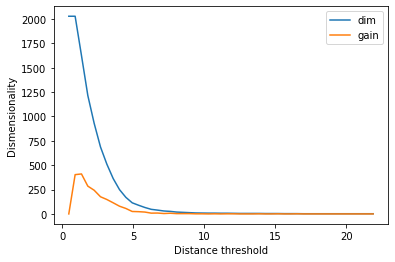

In [11]:
from matplotlib import pyplot as plt

param_list=[x['param'] for x in dims]
dim_list=[x['dim'] for x in dims]
diff_list=[x['diff'] for x in dims]

fig =plt.figure()
ax=fig.add_subplot()
ax.set_ylabel('Dismensionality')
ax.set_xlabel('Distance threshold')
plt.plot(param_list,dim_list,label='dim')
plt.plot(param_list,diff_list,label='gain')
ax.legend()
plt.show()

In [12]:
dims_sorted=sorted(dims,key=lambda x: x['diff'],reverse=True)
threshold=dims_sorted[0]['param']

model=FeatureAgglomeration(n_clusters=None,distance_threshold=threshold, pooling_func=np.min)
data_clustered=model.fit_transform(data)
data_clustered=pd.DataFrame(data_clustered)
labels=model.labels_
data_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Columns: 1625 entries, 0 to 1624
dtypes: int64(1625)
memory usage: 15.5 MB


In [13]:
from mlxtend.frequent_patterns import apriori

min_support=2/len(data)
itemsets=apriori(data_clustered,min_support=min_support,max_len=2)

itemsets

,support,itemsets
0,0.0016,(119)
1,0.0040,(181)
2,0.0064,(182)
3,0.0040,(192)
4,0.0016,(193)
...,...,...
2977,0.0016,"(1418, 1618)"
2978,0.0016,"(1419, 1615)"
2979,0.0016,"(1603, 1463)"
2980,0.0016,"(1560, 1479)"


In [14]:
from mlxtend.frequent_patterns import association_rules

rules=association_rules(itemsets,min_threshold=min_support)
rules['antecedents']=rules['antecedents'].apply(lambda x: list(x)[0])
rules['consequents']=rules['consequents'].apply(lambda x: list(x)[0])

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,987,181,0.0080,0.0040,0.0016,0.200000,50.000000,0.001568,1.245000
1,181,987,0.0040,0.0080,0.0016,0.400000,50.000000,0.001568,1.653333
2,181,1311,0.0040,0.1032,0.0016,0.400000,3.875969,0.001187,1.494667
3,1311,181,0.1032,0.0040,0.0016,0.015504,3.875969,0.001187,1.011685
4,454,182,0.0032,0.0064,0.0016,0.500000,78.125000,0.001580,1.987200
...,...,...,...,...,...,...,...,...,...
4269,1463,1603,0.0136,0.0064,0.0016,0.117647,18.382353,0.001513,1.126080
4270,1560,1479,0.0024,0.0256,0.0016,0.666667,26.041667,0.001539,2.923200
4271,1479,1560,0.0256,0.0024,0.0016,0.062500,26.041667,0.001539,1.064107
4272,1599,1479,0.0256,0.0256,0.0016,0.062500,2.441406,0.000945,1.039360


In [15]:
incls=rules[rules['confidence']==1]
incls=incls[['antecedents','consequents']]

incls

,antecedents,consequents
14,193,1119
24,330,227
325,236,1555
444,269,1007
447,269,1029
...,...,...
4106,1262,1311
4113,1268,1404
4122,1278,1311
4246,1370,1388


In [16]:
!pip install Cython
!pip install owlready2
from owlready2 import *
import types

onto =get_ontology('http://onto.owl')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.5 MB 1.2 MB/s 
  Created wheel for owlready2: filename=Owlready2-0.39-cp37-cp37m-linux_x86_64.whl size=22132057 sha256=c4fabdbac4e29aabf6e6de6c42d89a391c33fb4dd0b8fb5ecf65331ac08fa9f5
  Stored in directory: /root/.cache/pip/wheels/c9/5b/fc/da1e42a17f22cd62bfb170f847a3fb541a7f628858ad3595ec
Successfully built owlready2


In [17]:
with onto:
  onto_sent = types.new_class('Sentence',(Thing,))
  types.new_class('hasText',(DataProperty,FunctionalProperty))
  for i,sent in enumerate(X):
    sent_inst=onto_sent(f'sentence_{i}')
    sent_inst.hasText=sent

onto.save('onto.owl')

In [18]:
with onto:
  onto_token=types.new_class('Token',(Thing,))
  for i,token in enumerate(data.columns):
    token_inst=onto_token(f'token_{i}')
    token_inst.label=token

onto.save('onto.owl')

In [19]:
with onto:
  hasToken= types.new_class('hasToken',(ObjectProperty,))
  for i,row in data.iterrows():
    sent_inst=onto[f'sentence_{i}']
    for j,token in enumerate(data.columns):
      if row[token]==1:
        token_inst=onto[f'token_{j}']
        sent_inst.hasToken.append(token_inst)

onto.save('onto.owl')

In [20]:
with onto:
  onto_clust= types.new_class('Cluster',(Thing,))
  for label in set(labels):
    clust_cl = types.new_class(f'Cluster_{label}',(onto_clust,))


onto.save('onto.owl')

In [21]:
with onto:
  for i,label in enumerate(labels):
    clust_cl=onto[f'Cluster_{label}']
    token_inst=onto[f'token_{i}']
    clust_cl.equivalent_to.append(hasToken.value(token_inst))

onto.save('onto.owl')

In [22]:
with onto:
  for index,row in incls.iterrows():
    ant=row['antecedents']
    con=row['consequents']
    ant_cl=onto[f'Cluster_{ant}']
    con_cl=onto[f'Cluster_{con}']
    reverse=incls[(incls['antecedents']==con)&(incls['consequents']==ant)]
    if reverse.empty:
      ant_cl.is_a.append(con_cl)
    else:
      ant_cl.equivalent_to.append(con_cl)

onto.save('onto.owl')

In [23]:
with onto:
  sync_reasoner_pellet()

onto.save('onto_reasoned.owl',format='ntriples')

* Owlready2 * Running Pellet...
    java -Xmx2000M -cp /usr/local/lib/python3.7/dist-packages/owlready2/pellet/xml-apis-1.4.01.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/jgrapht-jdk1.5.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/antlr-runtime-3.2.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/slf4j-log4j12-1.6.4.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/jena-core-2.10.0.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/jena-iri-0.9.5.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/httpcore-4.2.2.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/httpclient-4.2.3.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/slf4j-api-1.6.4.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/xercesImpl-2.10.0.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/pellet-2.3.1.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/jena-arq-2.10.0.jar:/usr/local/lib/python3.7/dist